In [ ]:
import pandas as pd
import numpy as np
import librosa
from IPython.display import Audio
import seaborn as sns
from keras.models import Model
from keras.layers import Dense, Dropout, Input,BatchNormalization, Add, LSTM
from keras.optimizers import SGD
from keras.utils import plot_model
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
%matplotlib inline

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

file_name = os.listdir('/content/gdrive/MyDrive/Proj4-2/train/train')

In [ ]:
print(file_name)

['1345FN.wav', '1347MS.wav', '1348MN.wav', '1350MS.wav', '1351FS.wav', '1353FW.wav', '1354FN.wav', '1355MN.wav', '1356FH.wav', '1357MA.wav', '1358MA.wav', '1359MN.wav', '1362FA.wav', '1363FN.wav', '1364MN.wav', '1365MW.wav', '1366FW.wav', '1367MW.wav', '1368FA.wav', '1369MN.wav', '1371MN.wav', '1372MA.wav', '1376FA.wav', '1377MN.wav', '1378MA.wav', '1380FS.wav', '1384FS.wav', '1385MA.wav', '1386MN.wav', '1387MN.wav', '1388MS.wav', '1389FH.wav', '1390FN.wav', '1392FH.wav', '1393MA.wav', '1394MN.wav', '1395FS.wav', '1396MN.wav', '1397MA.wav', '1398FA.wav', '1402MA.wav', '1403MA.wav', '1405MA.wav', '1406MN.wav', '1407MN.wav', '1408MS.wav', '1409MS.wav', '1410MH.wav', '1411FA.wav', '1412MN.wav', '1413MA.wav', '1414FA.wav', '1415MA.wav', '1416MH.wav', '1417MA.wav', '1418MA.wav', '1420MN.wav', '1421MN.wav', '1422MN.wav', '1424MS.wav', '1425MN.wav', '1426MN.wav', '1428MN.wav', '1431MA.wav', '1432MA.wav', '1433FN.wav', '1434MN.wav', '1436FW.wav', '1438FA.wav', '1439FN.wav', '1440FN.wav', '1443

In [ ]:
len(file_name)

1994

##creating feeling label and gender label from file names

In [ ]:
label = []
for i in range(len(file_name)):
  label.append(file_name[i][4:6])

In [ ]:
print(label)

['FN', 'MS', 'MN', 'MS', 'FS', 'FW', 'FN', 'MN', 'FH', 'MA', 'MA', 'MN', 'FA', 'FN', 'MN', 'MW', 'FW', 'MW', 'FA', 'MN', 'MN', 'MA', 'FA', 'MN', 'MA', 'FS', 'FS', 'MA', 'MN', 'MN', 'MS', 'FH', 'FN', 'FH', 'MA', 'MN', 'FS', 'MN', 'MA', 'FA', 'MA', 'MA', 'MA', 'MN', 'MN', 'MS', 'MS', 'MH', 'FA', 'MN', 'MA', 'FA', 'MA', 'MH', 'MA', 'MA', 'MN', 'MN', 'MN', 'MS', 'MN', 'MN', 'MN', 'MA', 'MA', 'FN', 'MN', 'FW', 'FA', 'FN', 'FN', 'FN', 'MN', 'FS', 'MS', 'FH', 'FA', 'MA', 'FA', 'MN', 'FH', 'MH', 'MH', 'MA', 'FA', 'MN', 'MH', 'MS', 'FA', 'MN', 'FA', 'FA', 'MA', 'MN', 'MA', 'FA', 'MA', 'FA', 'MH', 'FA', 'MA', 'FN', 'MA', 'MA', 'MH', 'FA', 'FA', 'FA', 'MS', 'FH', 'MW', 'FA', 'FW', 'FN', 'FA', 'MN', 'FN', 'MN', 'MA', 'FS', 'FA', 'MN', 'MS', 'MA', 'MA', 'MN', 'FS', 'MS', 'FS', 'MN', 'MA', 'FW', 'FN', 'MN', 'MW', 'MN', 'MN', 'FA', 'MW', 'MA', 'MN', 'MN', 'FW', 'FA', 'FS', 'FA', 'MS', 'MN', 'MA', 'MA', 'FS', 'MN', 'FS', 'MA', 'FS', 'MA', 'MN', 'FH', 'FW', 'MA', 'MN', 'MN', 'MS', 'FA', 'FN', 'FN', 'MA

حرف اول نشان دهنده ی جنسیت است و حرف دوم احساس آن جمله را بیان میکند. با توجه به اینکه دو جنسیت و 5 احساس داریم در مجموع 10 ویژگی خواهیم داشت.

In [ ]:
unique_values = set(label)
print(unique_values)

{'MS', 'FS', 'FW', 'MW', 'FH', 'MN', 'FA', 'MH', 'FN', 'MA'}


In [ ]:
print("number of FS: ", label.count('FS'))
print("number of MA: ", label.count('MA'))
print("number of FW: ", label.count('FW'))
print("number of MH: ", label.count('MH'))
print("number of FH: ", label.count('FH'))
print("number of FA: ", label.count('FA'))
print("number of MW: ", label.count('MW'))
print("number of FN: ", label.count('FN'))
print("number of MN: ", label.count('MN'))
print("number of MS: ", label.count('MS'))


number of FS:  182
number of MA:  415
number of FW:  81
number of MH:  59
number of FH:  71
number of FA:  308
number of MW:  68
number of FN:  197
number of MN:  493
number of MS:  120


طبق نتیجه بالا می بینیم که تعداد داده ها از نوع مرد بی تفاوت و مرد خشمگین نسبت
به بقیه داده ها بیشتر است و احتمال می رود به همین دلیل و به دلیل عدم توازن در تعداد ها مدل ما به سمت این دو کلاس بایاس کند.

In [ ]:
# encoding labels with label encoding
le = LabelEncoder()
le.fit(label)
label = le.transform(label)
label = to_categorical(label)

In [ ]:
# y_trai
label.shape

(1994, 10)

In [ ]:
label[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

##Display an audio from each feeling label and gender for test and plotting the audio file's waveform 

In [ ]:
import IPython
import librosa.display

In [ ]:
# gender : Femal - emotion : neutral
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1345FN.wav')

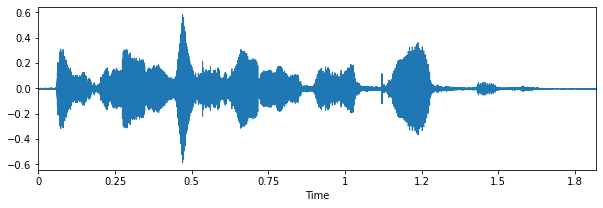

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1345FN.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
female = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

In [ ]:
#gender : Male - emotion : Neutral
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1348MN.wav')

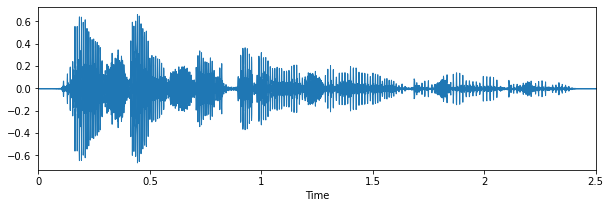

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1348MN.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
male = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

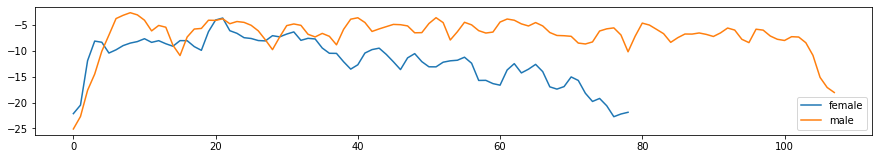

In [ ]:
# two audio waves together 
plt.figure(figsize=(15, 8))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [ ]:
# gender : Female - emotion : happy
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1356FH.wav')

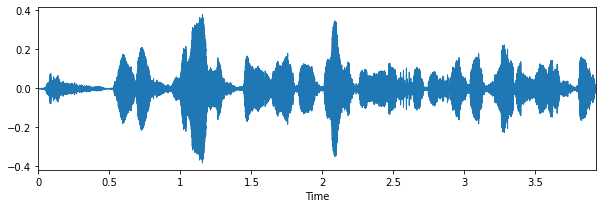

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1356FH.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
female = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

In [ ]:
# gender : Male - emotion : happy
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1410MH.wav')

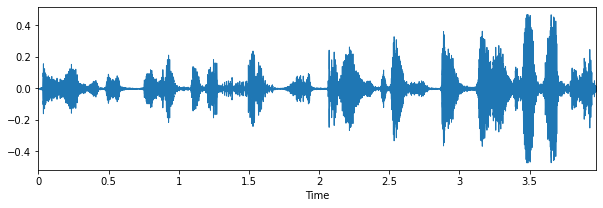

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1410MH.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
male = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

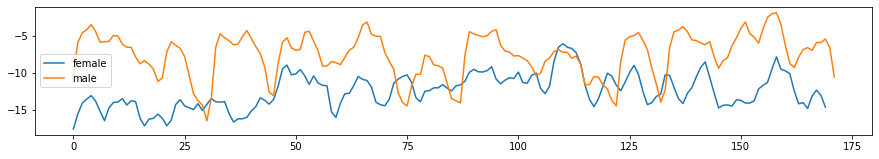

In [ ]:
# two audio waves together 
plt.figure(figsize=(15, 8))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [ ]:
male.shape

(172,)

In [ ]:
#gender : Female - emotion : Angry
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1362FA.wav')

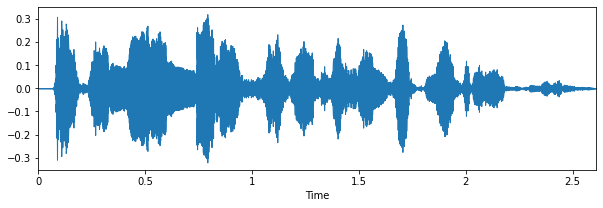

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1362FA.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
female = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

In [ ]:
#gender : Male - emotion : Angry
IPython.display.Audio('/content/gdrive/MyDrive/Proj4-2/train/train/1357MA.wav')

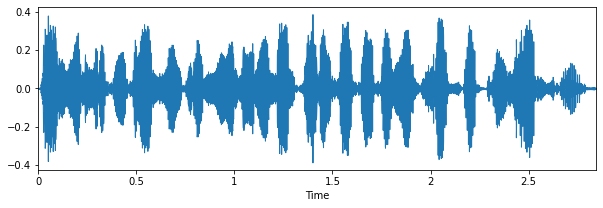

In [ ]:
data, sampling_rate = librosa.load('/content/gdrive/MyDrive/Proj4-2/train/train/1357MA.wav')
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)
male = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=25), axis=0)

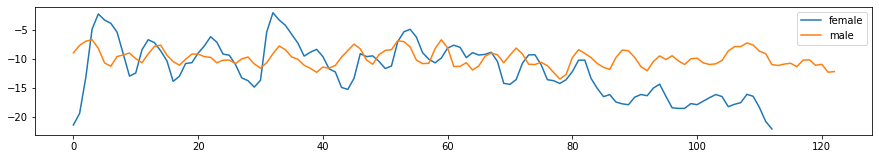

In [ ]:
# two audio waves together 
plt.figure(figsize=(15, 8))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

##Getting the features of training audio files using librosa

In [ ]:
def extract_mfcc(file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path sound
    #Output: mfcc_features'''
    root = '/content/gdrive/MyDrive/Proj4-2/train/train/'
    path =  root + file_name 
    y, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sample_rate,n_mfcc=25).T,axis=0)
    
    return mfccs

In [ ]:
features_mfcc = []

for filename in file_name:
    features_mfcc.append(extract_mfcc(filename))


In [ ]:
len(features_mfcc)

1994

In [ ]:
features_mfcc[0]

array([-296.6575957 ,   79.72409734,  -24.37202981,    6.06310748,
        -14.48516742,    1.19440528,  -10.38078547,   -5.73889922,
        -10.94875648,   -8.63020808,  -12.45638332,    2.725659  ,
        -15.44676259,   -5.43160728,   -3.38275547,   -1.81850994,
         -3.1323464 ,    0.58181952,   -0.55257928,    9.47400938,
          1.19290919,    7.78627363,    3.69457607,    9.0731352 ,
         -1.73712817])

In [ ]:
# mfcc feature
sound_features = []

for i in range(len(file_name)):
    mfcc = features_mfcc[i]
    feature = np.array([mfcc]).reshape(25,1)
    sound_features.append(feature)
# x_train    
sound_features = np.asarray(sound_features)

In [ ]:
sound_features.shape

(1994, 25, 1)

In [ ]:
label.shape

(1994, 10)

##data normalization

In [ ]:
# Lets do data normalization 
mean = np.mean(sound_features, axis=0) # mean of data
std = np.std(sound_features, axis=0) # standard derivative of data

sound_features = (sound_features - mean)/std

In [ ]:
sound_features[0]

array([[-0.25710092],
       [-0.32215288],
       [-0.85436764],
       [-1.24432566],
       [-0.63347332],
       [-0.57844061],
       [-0.08501065],
       [-0.89294346],
       [ 0.72357448],
       [-1.31544989],
       [ 0.1088383 ],
       [ 0.79272222],
       [-0.84738266],
       [-0.30225292],
       [ 0.25801596],
       [-0.13495014],
       [ 0.32209988],
       [-0.16473378],
       [ 0.37620667],
       [ 1.26240038],
       [ 0.8843304 ],
       [ 0.87369867],
       [ 1.35985777],
       [ 1.15987839],
       [ 0.3183824 ]])

##divide training data inot training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(np.array(sound_features),label, test_size=0.20, random_state=42,shuffle=False)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

1595
1595
399
399


##test data preprocessing

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/Sound/result.csv')

In [ ]:
test.head()

,Id,label
0,2705F,N
1,2707M,H
2,2708F,N
3,2710M,A
4,2711M,A


In [ ]:
filename_test = test['Id'].values.tolist()
y_actual_test = test['label'].values.tolist()

In [ ]:
print(filename_test)
print(y_actual_test)

['2705F', '2707M', '2708F', '2710M', '2711M', '2712M', '2713M', '2714M', '2715M', '2720F', '2721M', '2722F', '2724F', '2725M', '2726M', '2727F', '2728M', '2729F', '2733M', '2734F', '2735M', '2736M', '2737F', '2738M', '2740M', '2741M', '2743M', '2744F', '2745F', '2746F', '2747M', '2748M', '2749M', '2750M', '2752M', '2753M', '2754F', '2755M', '2756M', '2757M', '2761F', '2762M', '2764M', '2765M', '2766M', '2767F', '2768F', '2769M', '2770F', '2771M', '2772M', '2773M', '2774M', '2775M', '2776F', '2779M', '2780M', '2782F', '2783M', '2784F', '2785M', '2786M', '2787F', '2788F', '2790F', '2791F', '2792M', '2793M', '2794M', '2795M', '2797F', '2798M', '2800F', '2801F', '2802M', '2803F', '2804M', '2805F', '2806M', '2808M', '2810M', '2811M', '2812F', '2813M', '2814F', '2815M', '2816F', '2817M', '2818F', '2819M', '2820F', '2821M', '2822F', '2823M', '2825F', '2826F', '2827F', '2828F', '2830F', '2831M', '2834M', '2835M', '2836F', '2837M', '2838F', '2839F', '2841M', '2844F', '2845M', '2850M', '2851M', 

In [ ]:
for i in range(len(filename_test)):
  filename_test[i] = filename_test[i] + '.wav' 

In [ ]:
for i in range(len(filename_test)):
  y_actual_test[i] =  filename_test[i][4] + y_actual_test[i]

In [ ]:
print(y_actual_test)

['FN', 'MH', 'FN', 'MA', 'MA', 'MA', 'MW', 'MH', 'MA', 'FN', 'MN', 'FA', 'FS', 'MW', 'MA', 'FA', 'MS', 'FS', 'MA', 'FN', 'MA', 'MN', 'FW', 'MA', 'MN', 'MA', 'MA', 'FS', 'FA', 'FS', 'MN', 'MN', 'MN', 'MN', 'MN', 'MA', 'FS', 'MH', 'MA', 'MN', 'FN', 'MN', 'MA', 'MH', 'MN', 'FN', 'FA', 'MA', 'FS', 'MN', 'MN', 'MN', 'MS', 'MN', 'FA', 'MN', 'MN', 'FA', 'MH', 'FA', 'MS', 'MS', 'FA', 'FA', 'FN', 'FS', 'MA', 'MW', 'MA', 'MS', 'FA', 'MN', 'FA', 'FS', 'MS', 'FH', 'MA', 'FH', 'MA', 'MA', 'MN', 'MN', 'FS', 'MH', 'FA', 'MN', 'FA', 'MS', 'FH', 'MH', 'FN', 'MN', 'FS', 'MA', 'FA', 'FS', 'FA', 'FS', 'FA', 'MN', 'MN', 'MN', 'FN', 'MN', 'FA', 'FA', 'MN', 'FN', 'MA', 'MN', 'MA', 'MN', 'FA', 'MN', 'FS', 'FN', 'MA', 'FN', 'FS', 'MW', 'MN', 'FA', 'MN', 'MH', 'MN', 'FN', 'MH', 'FA', 'FW', 'MN', 'FN', 'MA', 'MN', 'MA', 'MS', 'FS', 'MN', 'MH', 'MN', 'FN', 'FA', 'MN', 'MN', 'FH', 'MN', 'MN', 'MN', 'FA', 'FS', 'MN', 'MN', 'FN', 'MA', 'MN', 'FH', 'MA', 'MA', 'MA', 'MN', 'FH', 'FA', 'MH', 'MA', 'MA', 'MN', 'FA', 'MN

In [ ]:
unique_values_test = set(y_actual_test)
print(unique_values_test)

{'MS', 'FS', 'FW', 'FH', 'MN', 'FA', 'MH', 'FN', 'MW', 'MA'}


In [ ]:
print("number of FS: ", y_actual_test.count('FS'))
print("number of MA: ", y_actual_test.count('MA'))
print("number of FW: ", y_actual_test.count('FW'))
print("number of MH: ", y_actual_test.count('MH'))
print("number of FH: ", y_actual_test.count('FH'))
print("number of FA: ", y_actual_test.count('FA'))
print("number of MW: ", y_actual_test.count('MW'))
print("number of FN: ", y_actual_test.count('FN'))
print("number of MN: ", y_actual_test.count('MN'))
print("number of MS: ", y_actual_test.count('MS'))

number of FS:  18
number of MA:  43
number of FW:  6
number of MH:  15
number of FH:  7
number of FA:  29
number of MW:  8
number of FN:  23
number of MN:  69
number of MS:  9


In [ ]:
# encoding labels with label encoding
le.fit(y_actual_test)
y_actual_test = le.transform(y_actual_test)
y_actual_test = to_categorical(y_actual_test) # y_test

In [ ]:
len(y_actual_test)

227

In [ ]:
def extract_mfcc_test(file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path sound
    #Output: mfcc_features'''
    root = '/content/gdrive/MyDrive/Proj4-2/test/test/'
    path =  root + file_name 
    y, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sample_rate,n_mfcc=25).T,axis=0)
    
    return mfccs

In [ ]:
test_features_mfcc = []

for filename in filename_test:
    test_features_mfcc.append(extract_mfcc_test(filename))

In [ ]:
# mfcc feature
test_sound_features = []

for i in range(len(filename_test)):
    mfcc = test_features_mfcc[i]
    feature = np.array([mfcc]).reshape(25,1)
    test_sound_features.append(feature)
# x_test    
test_sound_features = np.asarray(test_sound_features)

In [ ]:
# normalize test dataset
test_sound_features = (test_sound_features - mean)/std

In [ ]:
test_sound_features[0]

array([[-1.68861023],
       [ 2.40120172],
       [ 0.6429114 ],
       [-0.59033752],
       [-0.01358465],
       [-1.20740146],
       [ 0.1242658 ],
       [-2.7973347 ],
       [ 0.34090274],
       [-0.91637226],
       [-0.42229766],
       [-0.13869124],
       [ 0.75107043],
       [-0.37243954],
       [ 0.15051491],
       [-0.61186478],
       [ 0.2214696 ],
       [-0.55268298],
       [-0.19905376],
       [-0.34848099],
       [ 0.83462623],
       [-0.64860949],
       [ 0.6056274 ],
       [-0.80546385],
       [ 0.04064664]])

In [ ]:
print(test_sound_features.shape)
print(y_actual_test.shape)

(227, 25, 1)
(227, 10)


##Model1(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(128, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model1 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170   

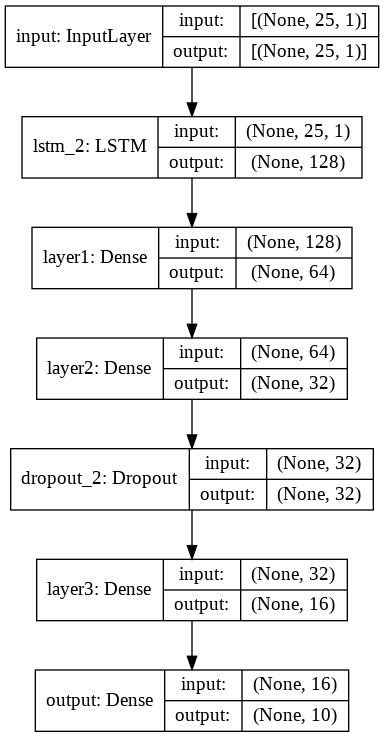

In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 4s 131ms/step - loss: 2.2710 - accuracy: 0.1788 - val_loss: 2.1377 - val_accuracy: 0.3709
Epoch 2/60
13/13 [==============================] - 1s 77ms/step - loss: 2.1311 - accuracy: 0.3267 - val_loss: 1.8604 - val_accuracy: 0.4486
Epoch 3/60
13/13 [==============================] - 1s 81ms/step - loss: 1.9812 - accuracy: 0.3938 - val_loss: 1.7696 - val_accuracy: 0.4787
Epoch 4/60
13/13 [==============================] - 1s 82ms/step - loss: 1.9028 - accuracy: 0.4395 - val_loss: 1.6890 - val_accuracy: 0.5163
Epoch 5/60
13/13 [==============================] - 1s 76ms/step - loss: 1.8403 - accuracy: 0.4566 - val_loss: 1.6678 - val_accuracy: 0.5188
Epoch 6/60
13/13 [==============================] - 1s 76ms/step - loss: 1.7725 - accuracy: 0.4741 - val_loss: 1.6456 - val_accuracy: 0.5088
Epoch 7/60
13/13 [==============================] - 1s 75ms/step - loss: 1.7735 - accuracy: 0.4581 - val_loss: 1.6279 - val_accuracy: 0.5188
Epoch 8/60
1

In [ ]:
model1.save_weights("lstm1_gender_weights.h5")
model1.save("lstm1_gender.h5")

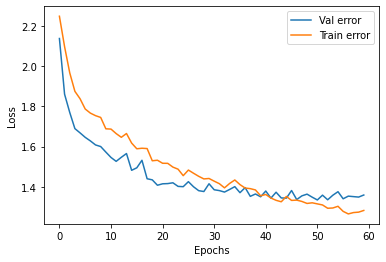

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که در شکل بالا میبینیم مدل از ایپاک 40 در آستانه اورفیت شدن است و این به معنی آن است که مدل حال حفظ داده ها اسن و قدرت تعیمیم مدل کاهش پیدا می کند. باید به دنبال مدل بهتری باشیم.

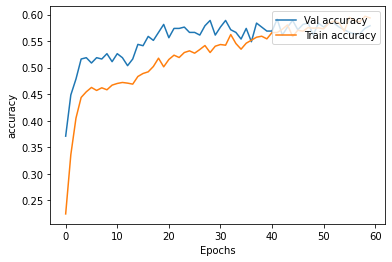

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
loss, acc = model1.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 16ms/step - loss: 1.3624 - accuracy: 0.5551
Test loss: 1.362365961074829
Test accuracy: 0.5550661087036133


##Model2(LSTM)

در اینجا مدل را نسبت به مدل قبل ساده تر می کنیم به اینصورت که تعداد یونیت های ال اس تی ام را 25 تا در نظر می گیریم حددا یک چهارم تعداد در مدل قبل تا جلوی اورفیت شدن را بگیریم.

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(25, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model2 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                2700      
_________________________________________________________________
layer1 (Dense)               (None, 64)                1664      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170   

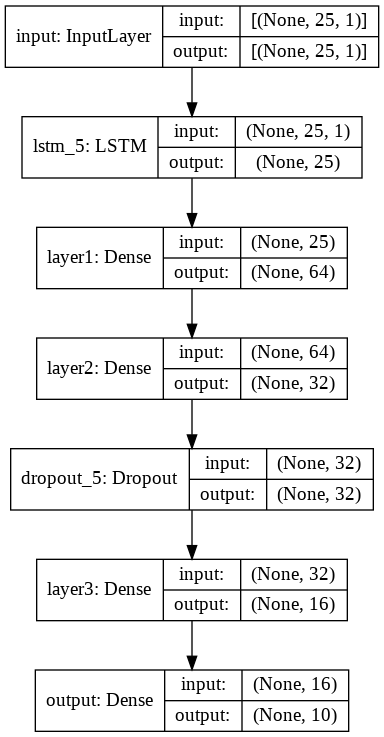

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 3s 65ms/step - loss: 2.2895 - accuracy: 0.1886 - val_loss: 2.2220 - val_accuracy: 0.3609
Epoch 2/60
13/13 [==============================] - 0s 18ms/step - loss: 2.2177 - accuracy: 0.3195 - val_loss: 2.1161 - val_accuracy: 0.3559
Epoch 3/60
13/13 [==============================] - 0s 18ms/step - loss: 2.1352 - accuracy: 0.3310 - val_loss: 1.9604 - val_accuracy: 0.3885
Epoch 4/60
13/13 [==============================] - 0s 18ms/step - loss: 1.9922 - accuracy: 0.3349 - val_loss: 1.8089 - val_accuracy: 0.3960
Epoch 5/60
13/13 [==============================] - 0s 18ms/step - loss: 1.9039 - accuracy: 0.3539 - val_loss: 1.7553 - val_accuracy: 0.4010
Epoch 6/60
13/13 [==============================] - 0s 17ms/step - loss: 1.8594 - accuracy: 0.3708 - val_loss: 1.7319 - val_accuracy: 0.4286
Epoch 7/60
13/13 [==============================] - 0s 19ms/step - loss: 1.8267 - accuracy: 0.3986 - val_loss: 1.7119 - val_accuracy: 0.4511
Epoch 8/60
13

In [ ]:
model2.save_weights("lstm2_gender_weights.h5")
model2.save("lstm2_gender.h5")

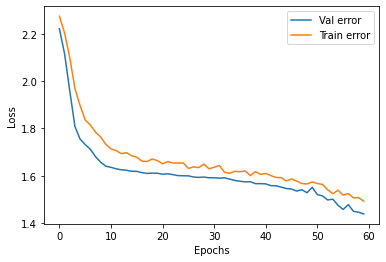

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که میبینیم خطا روی داده های آموزشی و ولید کاهش می یابد امااین کاهش سرعت کمی دارد و طبق نتایج مدل خطا و دقت روی داده های آوزشی و ولید مدل 1 ما نسبت به این مدل نتیجه بهتری دارد.

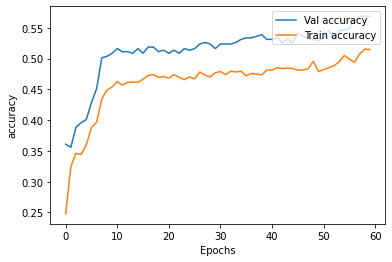

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

طبق نتایج روی داده های تست نیز مشاهده می شود مدل 1 نسبت به این مدل بهتر است. بنظر می رسد این مدل پیچیدگی کمتر از داده های ما دارد و خیلی ساده تر از مسئله است به همین دلیل نتوانسته داده های آموزشی را به خوبی یاد بگیرد.

In [ ]:
loss, acc = model2.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 5ms/step - loss: 1.4527 - accuracy: 0.5198
Test loss: 1.4526896476745605
Test accuracy: 0.5198237895965576


##Model3(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(100, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(32 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model3 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               40800     
_________________________________________________________________
layer1 (Dense)               (None, 64)                6464      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 10)                330   

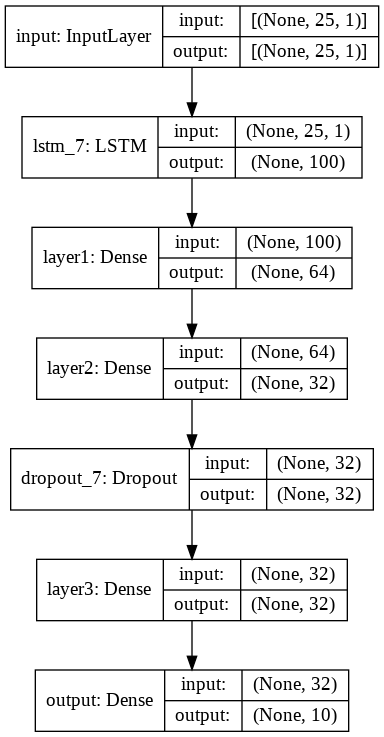

In [ ]:
plot_model(model3, show_shapes=True)

In [ ]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 3s 101ms/step - loss: 2.2762 - accuracy: 0.2108 - val_loss: 2.1500 - val_accuracy: 0.3659
Epoch 2/60
13/13 [==============================] - 1s 52ms/step - loss: 2.1097 - accuracy: 0.3206 - val_loss: 1.8826 - val_accuracy: 0.4662
Epoch 3/60
13/13 [==============================] - 1s 55ms/step - loss: 1.9550 - accuracy: 0.3311 - val_loss: 1.7252 - val_accuracy: 0.5013
Epoch 4/60
13/13 [==============================] - 1s 56ms/step - loss: 1.8145 - accuracy: 0.4134 - val_loss: 1.6829 - val_accuracy: 0.4962
Epoch 5/60
13/13 [==============================] - 1s 53ms/step - loss: 1.7858 - accuracy: 0.4360 - val_loss: 1.6483 - val_accuracy: 0.5013
Epoch 6/60
13/13 [==============================] - 1s 54ms/step - loss: 1.7821 - accuracy: 0.4225 - val_loss: 1.6424 - val_accuracy: 0.4812
Epoch 7/60
13/13 [==============================] - 1s 54ms/step - loss: 1.7345 - accuracy: 0.4444 - val_loss: 1.6192 - val_accuracy: 0.5038
Epoch 8/60
1

In [ ]:
model3.save_weights("lstm3_gender_weights.h5")
model3.save("lstm3_gender.h5")

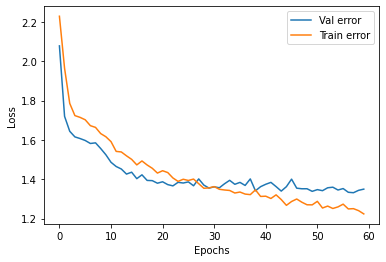

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

در شکل می بینیم که خطا روی داده های آموزشی و ولید کاهش پیدا می کند اما از ایپاک حدود 30 ام مدل در آستانه اورفیت شدن قرار می گیرد
و طبق مقایسه ی خطا مدل روی داده های آموزشی و ولید می بینیم که مدل 1  بهتر از این مدل است. .

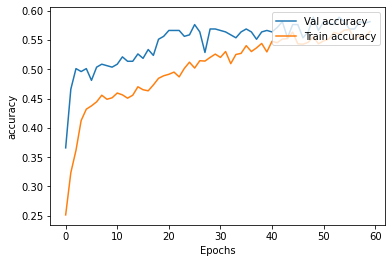

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

##Model4(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(64, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model4 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                16896     
_________________________________________________________________
layer1 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170   

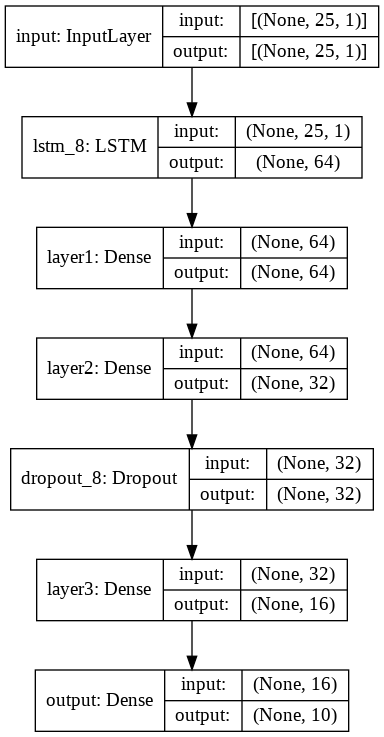

In [ ]:
plot_model(model4, show_shapes=True)

In [ ]:
model4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model4.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 3s 79ms/step - loss: 2.2725 - accuracy: 0.2393 - val_loss: 2.1706 - val_accuracy: 0.3885
Epoch 2/60
13/13 [==============================] - 0s 32ms/step - loss: 2.1273 - accuracy: 0.3289 - val_loss: 1.9592 - val_accuracy: 0.4536
Epoch 3/60
13/13 [==============================] - 0s 33ms/step - loss: 1.9165 - accuracy: 0.3891 - val_loss: 1.7751 - val_accuracy: 0.4962
Epoch 4/60
13/13 [==============================] - 0s 32ms/step - loss: 1.8324 - accuracy: 0.4448 - val_loss: 1.6971 - val_accuracy: 0.5038
Epoch 5/60
13/13 [==============================] - 0s 32ms/step - loss: 1.8103 - accuracy: 0.4404 - val_loss: 1.6836 - val_accuracy: 0.5038
Epoch 6/60
13/13 [==============================] - 0s 33ms/step - loss: 1.7564 - accuracy: 0.4526 - val_loss: 1.6694 - val_accuracy: 0.4962
Epoch 7/60
13/13 [==============================] - 1s 60ms/step - loss: 1.7841 - accuracy: 0.4460 - val_loss: 1.6421 - val_accuracy: 0.5163
Epoch 8/60
13

In [ ]:
model4.save_weights("lstm4_gender_weights.h5")
model4.save("lstm4_gender.h5")

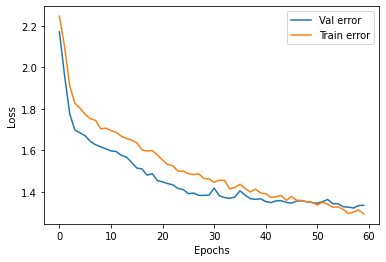

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

با توجه به نمودار می بینیم که خطا روی داده های اموزشی و ولید در حال کاهش است. و نسبت به مدل یک اوروفیت کم تری داریمو خطا هم روی داده های و هم روی داده های ولید نسبت به مدل یک کاهش داشته است. و دقت نیز بیشتر شده. این به دلیل اسن است که ما در اینجا تعداد یونیتی در ال اس تی ام را بین تعداد آن در مدل 2 و مدل 3 گرفته ایم تا به مدلی بین این دو برسیم که نه خیلی ساده باشد که داده ها را یاد نگیرد و نه خیلی پیچیده باشد که داده رو حفظ کند و این کار باعث می شود تعداد پارامترهای مدل کم شود و مدل زیاد پیچیده نشود.
پس تا اینجا این بهترین مدل ماست...

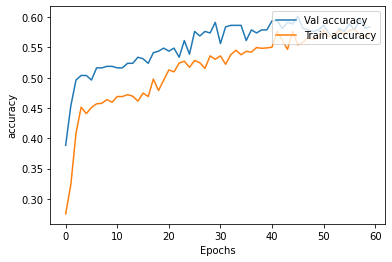

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

همانطور که میبینیم این مدل وری داده های تست نیز نتیجه بهتری نسبت به مدل 1 دارد.

In [ ]:
loss, acc = model4.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 9ms/step - loss: 1.3342 - accuracy: 0.5771
Test loss: 1.3341903686523438
Test accuracy: 0.5770925283432007


##Model5(GRU)

In [ ]:
from keras.layers import GRU

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
gru_layer1 = GRU(64, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(gru_layer1)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model5 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
gru_13 (GRU)                 (None, 64)                12864     
_________________________________________________________________
layer1 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170   

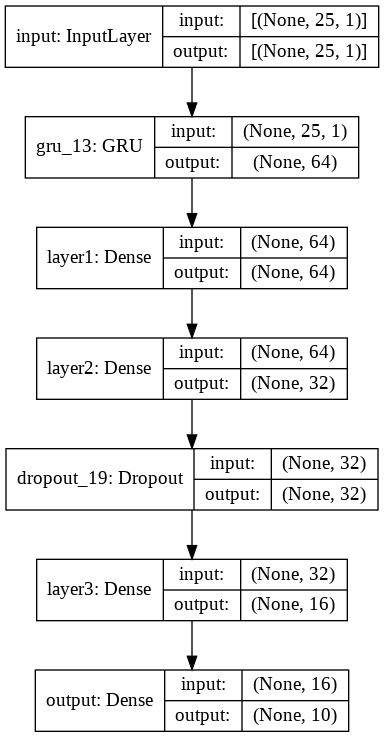

In [ ]:
plot_model(model5, show_shapes=True)

In [ ]:
model5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model5.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
13/13 [==============================] - 3s 114ms/step - loss: 2.2855 - accuracy: 0.1601 - val_loss: 2.1930 - val_accuracy: 0.3509
Epoch 2/60
13/13 [==============================] - 0s 30ms/step - loss: 2.1748 - accuracy: 0.2767 - val_loss: 2.0195 - val_accuracy: 0.3609
Epoch 3/60
13/13 [==============================] - 0s 28ms/step - loss: 2.0349 - accuracy: 0.3246 - val_loss: 1.9060 - val_accuracy: 0.3709
Epoch 4/60
13/13 [==============================] - 0s 29ms/step - loss: 2.0101 - accuracy: 0.3108 - val_loss: 1.8450 - val_accuracy: 0.3810
Epoch 5/60
13/13 [==============================] - 0s 30ms/step - loss: 1.9306 - accuracy: 0.3520 - val_loss: 1.8036 - val_accuracy: 0.3910
Epoch 6/60
13/13 [==============================] - 0s 30ms/step - loss: 1.9304 - accuracy: 0.3329 - val_loss: 1.7687 - val_accuracy: 0.3985
Epoch 7/60
13/13 [==============================] - 0s 29ms/step - loss: 1.8747 - accuracy: 0.3550 - val_loss: 1.7671 - val_accuracy: 0.3960
Epoch 8/60
1

In [ ]:
model5.save_weights("lstm5_gender_weights.h5")
model5.save("lstm5_gender.h5")

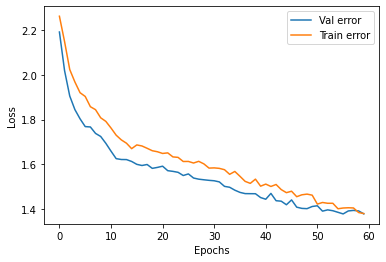

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که در شکل بالا مشاهده می شود خطای این مدل وری داده های آموزشی وولید در حال کاهش است. این مدل نسبت به مدل 4 تعداد پارامترهای کم تری دارد زیر در آن از جی آر یو استفاده کرده ایم و این لایه معماری ساده تری نسبت به ال اس دی ام دارد. همچنین این لایه باعث سریع تر شدن مدل هم می شود. اما طبق نتایج انهایی بدست آمده مدل 4 نسیبت به این مدل خطای کمتری روی داده های ولید و آموزشی دارد همچنین دقت بالاتری روی این داده ها دارد..
این می تواند به این دلیل باشد که چون معماری جی ار یو ساده تر است و  محاسبات کمتری دارد و به طبع پارامترهای کم تری دارد نسبت به مسئله ساده تر است و باعث شده مسئله را به خوبی یاد نگیرد.

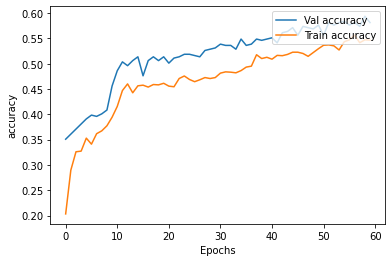

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
loss, acc = model5.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 7ms/step - loss: 1.3786 - accuracy: 0.5507
Test loss: 1.3785576820373535
Test accuracy: 0.5506607890129089


##load model4 and use it for predicting test results

In [ ]:
from tensorflow import keras
model4 = keras.models.load_model('/content/gdrive/MyDrive/proj4-2-models/lstm4_gender.h5')

In [ ]:
prediction = model4.predict(test_sound_features, batch_size = 64)

In [ ]:
prediction

array([[1.3262263e-02, 3.4563660e-03, 6.8809129e-02, ..., 5.0556016e-01,
        3.4299117e-02, 2.7856031e-02],
       [1.6755038e-03, 3.0478151e-03, 9.2750482e-02, ..., 7.6266551e-01,
        4.5478109e-02, 4.5508418e-02],
       [2.7787510e-01, 1.0469652e-01, 2.6532739e-01, ..., 3.4317640e-03,
        1.0915478e-02, 8.7996749e-03],
       ...,
       [5.2404746e-02, 3.8817458e-02, 2.8030270e-01, ..., 2.4074189e-01,
        6.1658002e-02, 6.4156778e-02],
       [9.6066862e-02, 7.7397175e-02, 4.7309649e-01, ..., 3.2886725e-02,
        3.2510143e-02, 3.7744679e-02],
       [9.1314316e-04, 3.4451933e-04, 5.4771141e-03, ..., 7.8698498e-01,
        8.6981811e-02, 3.2183908e-02]], dtype=float32)

In [ ]:
preds = prediction.argmax(axis=1)

In [ ]:
preds

array([7, 7, 0, 5, 5, 5, 7, 5, 5, 0, 7, 0, 0, 3, 5, 2, 8, 0, 7, 5, 5, 7,
       0, 5, 7, 0, 5, 2, 0, 2, 7, 7, 7, 7, 7, 5, 2, 5, 5, 7, 5, 7, 0, 7,
       7, 5, 5, 5, 0, 7, 7, 7, 7, 7, 0, 7, 7, 0, 5, 0, 7, 8, 0, 0, 2, 0,
       5, 7, 5, 2, 0, 7, 5, 0, 2, 2, 7, 3, 5, 5, 5, 7, 7, 7, 5, 2, 0, 7,
       5, 7, 5, 7, 0, 5, 0, 2, 0, 5, 2, 7, 7, 7, 2, 7, 0, 0, 7, 2, 3, 5,
       7, 7, 0, 7, 8, 2, 5, 2, 0, 7, 2, 0, 7, 5, 7, 7, 7, 5, 0, 7, 2, 5,
       7, 5, 8, 2, 7, 5, 7, 2, 0, 7, 7, 3, 7, 7, 7, 0, 0, 7, 7, 0, 5, 7,
       0, 5, 5, 5, 5, 2, 0, 5, 5, 5, 7, 5, 7, 3, 7, 2, 7, 7, 0, 7, 0, 7,
       0, 2, 7, 0, 7, 7, 7, 0, 5, 5, 0, 3, 7, 7, 5, 5, 7, 5, 7, 5, 7, 0,
       7, 0, 5, 2, 7, 5, 5, 3, 5, 7, 5, 5, 7, 5, 5, 7, 7, 7, 2, 5, 2, 5,
       7, 3, 8, 7, 2, 2, 7])

In [ ]:
abc = preds.astype(int).flatten()
# predict on test dataset
predictions_emotion = (le.inverse_transform((abc)))

In [ ]:
actual=y_actual_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (le.inverse_transform((abc123)))

In [ ]:
# save result in .csv file
result_emotion_gender = pd.DataFrame({'Id':filename_test ,'actualvalues': actualvalues, 'predictedvalues': predictions_emotion})
result_emotion_gender.to_csv('result_emotion_gender.csv', index=False)

In [ ]:
result_emotion_gender.head()

,Id,actualvalues,predictedvalues
0,2705F.wav,FN,MN
1,2707M.wav,MH,MN
2,2708F.wav,FN,FA
3,2710M.wav,MA,MA
4,2711M.wav,MA,MA


تعداد احساسات و جنسیت متمایز که توسط مدل پیش بینی شده

همانطور که در جدول زیر می بینیم هیچ داده ای به عنوان شاد تشخیص داده نشده و دلیل آن می تواند این باشد که مدل داده های مربوط به کلاس شاد را خیلی کم دیده و این تعداد آن ها در داده های اموزشی مناسب نبوده و به دلیل عدم توازن مدل این اتفاق افتاده است.

In [ ]:
result_emotion_gender.groupby('predictedvalues').count()

,Id,actualvalues
predictedvalues,,
FA,42,42
FN,27,27
FS,8,8
MA,61,61
MN,84,84
MS,5,5


برچسب واقعی داده های تست


In [ ]:
result_emotion_gender.groupby('actualvalues').count()

,Id,predictedvalues
actualvalues,,
FA,29,29
FH,7,7
FN,23,23
FS,18,18
FW,6,6
MA,43,43
MH,15,15
MN,69,69
MS,9,9


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/proj4-2-models/result_emotion_gender.csv')

In [ ]:
df.shape

(227, 3)

##confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


0.5770925110132159


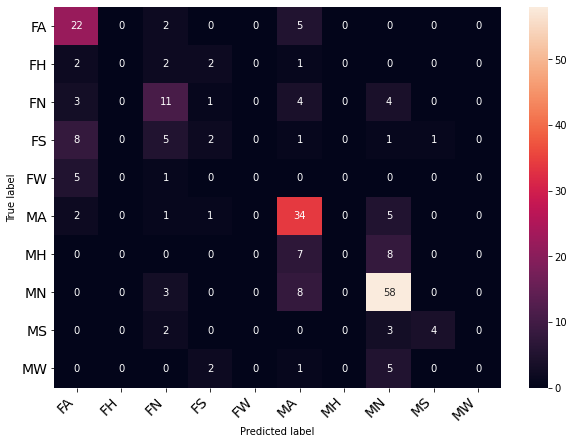

In [ ]:
# Get the predictions file 
classes = df.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(df.actualvalues, df.predictedvalues)
print(accuracy_score(df.actualvalues, df.predictedvalues))
print_confusion_matrix(c, class_names = classes)

همانطور که در ماتریس بالا مشاهده می شود باز هم مدل ما در کلاس هایی بهتر عمل می کند که به تعداد زیادی داده ی آموزشی از ان را دارد و در دو کلاس مرد بی تفاوت و مرد خشمگین که تعداد داده های ان ها نسبت به بقیه بیشتر بوده بهتر عمل می کند.

برای بهبود عملکرد مدل و جلوگیری از بایاس از روشی استفاده می کنیم که به هر کلاس وزن نسبت دهد.

##Assign a weight to each class for use during training

In [ ]:
print(len(y_train))
print(y_train)

1595
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
#Account for skew in our dataset (i.e. the fact that we have significantly more voices for some classes than others).
classTotals = y_train.sum(axis=0)
classWeight = classTotals.max() / classTotals 

همانطور که مشاهده می شود با دستور زیر به هر کلاسی وزن نسبت دد می شود. مثلا در این لیست دو وزن 7 و خورده ای ددیه می شود که حدس میزنیم این وزن ها مربوط به کلاس مرد خشمگین و مرد بی تفاوت باشد. از این وزن در هنگام آموزش مدل استفاده می شود تا مدل دچار بایاس نشود. 

In [ ]:
print(len(classWeight))
print(classWeight)

10
[1.6965812 6.8448277 2.4355829 2.8156028 6.1076922 1.1921922 7.6346154
 1.        4.010101  7.4905663]


In [ ]:
# convert type of classWeight to dictionary (keys of dictionary : classes and items : weight for each class)
classWeight = {i:classWeight[i] for i in range(classWeight.size)}
print(classWeight)

{0: 1.6965812, 1: 6.8448277, 2: 2.4355829, 3: 2.8156028, 4: 6.1076922, 5: 1.1921922, 6: 7.6346154, 7: 1.0, 8: 4.010101, 9: 7.4905663}


حال با استفاده از این وزن ها مدلی مشابه مدل 4 که بهترین مدل روی داده هایمان بدون در نظر گرفتن وزن بود می سازیم تا ببینیم عملکرد بهبود می یابد یا نه

#Model6 + class weight(LSTM)

In [ ]:
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(128, return_sequences=False, name = "lstm_layer")(input_layer)
hidden_layer1 = Dense(128 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(64 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5, name = 'droupout_layer')(hidden_layer2)
hidden_layer3 = Dense(32 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model6 = Model(inputs=input_layer, outputs=output_layer , name = "model")
model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 128)               16512     
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
droupout_layer (Dropout)     (None, 64)                0         
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330   

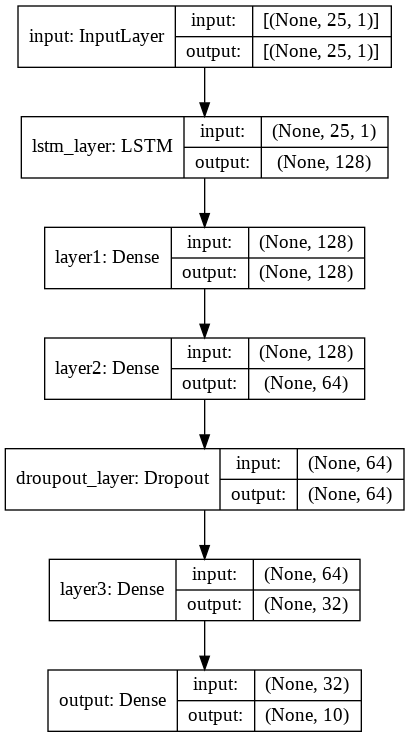

In [ ]:
plot_model(model6, show_shapes=True)

In [ ]:
model6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model6.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=100, batch_size = 128 ,verbose=1, class_weight= classWeight)

Epoch 1/100
13/13 [==============================] - 4s 156ms/step - loss: 5.6447 - accuracy: 0.0614 - val_loss: 2.2326 - val_accuracy: 0.0576
Epoch 2/100
13/13 [==============================] - 1s 77ms/step - loss: 5.5233 - accuracy: 0.0903 - val_loss: 2.0554 - val_accuracy: 0.0777
Epoch 3/100
13/13 [==============================] - 1s 79ms/step - loss: 5.0679 - accuracy: 0.1769 - val_loss: 1.9790 - val_accuracy: 0.2882
Epoch 4/100
13/13 [==============================] - 1s 78ms/step - loss: 5.1397 - accuracy: 0.2016 - val_loss: 1.9337 - val_accuracy: 0.3033
Epoch 5/100
13/13 [==============================] - 1s 78ms/step - loss: 4.9155 - accuracy: 0.2616 - val_loss: 1.8927 - val_accuracy: 0.3634
Epoch 6/100
13/13 [==============================] - 1s 79ms/step - loss: 5.0407 - accuracy: 0.2647 - val_loss: 1.8859 - val_accuracy: 0.3985
Epoch 7/100
13/13 [==============================] - 1s 77ms/step - loss: 4.9549 - accuracy: 0.3108 - val_loss: 1.8324 - val_accuracy: 0.4160
Epoch

In [ ]:
model6.save_weights("lstm6_gender_weights.h5")
model6.save("lstm6_gender.h5")

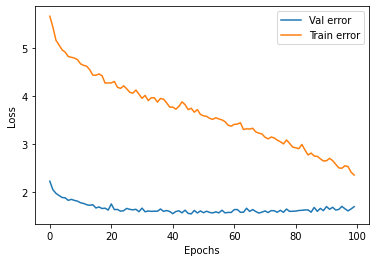

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

طبق مدل های مختلفی که ساختیم این مدل بهترین بود. خطا روی داده های آموزشی و ولید در حال کاهش است امااین کاهش سرعت مناسبی ندارد. همچنین این مدل روی همین داده ها بدون در نظر گرفتن وزن خوب عمل می کرد و حتی اورفیت شده بود ولی اینجا بدتر عمل می کند. و بنظر می رسد یادگیری وزن ها مسئله را پیچیده تر میکند و نیاز به مدل پیچیده ترم هست

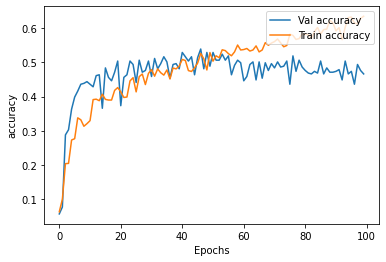

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

In [ ]:
loss, acc = model6.evaluate(test_sound_features, y_actual_test,
                            batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', acc)

4/4 [==============================] - 0s 15ms/step - loss: 1.6297 - accuracy: 0.4581
Test loss: 1.6297072172164917
Test accuracy: 0.458149790763855


In [ ]:
prediction = model6.predict(test_sound_features, batch_size = 64)

In [ ]:
preds = prediction.argmax(axis=1)

In [ ]:
abc = preds.astype(int).flatten()
# predict on test dataset
predictions_emotion = (le.inverse_transform((abc)))

In [ ]:
actual=y_actual_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (le.inverse_transform((abc123)))

In [ ]:
# save result in .csv file
result_emotion_gender1 = pd.DataFrame({'Id':filename_test ,'actualvalues': actualvalues, 'predictedvalues': predictions_emotion})
result_emotion_gender1.to_csv('result_emotion_gender1.csv', index=False)

In [ ]:
result_emotion_gender1.groupby('predictedvalues').count()

,Id,actualvalues
predictedvalues,,
FA,22,22
FH,16,16
FN,25,25
FS,8,8
FW,6,6
MA,39,39
MH,22,22
MN,53,53
MS,21,21


In [ ]:
result_emotion.groupby('actualvalues').count()

,Id,predictedvalues
actualvalues,,
FA,29,29
FH,7,7
FN,23,23
FS,18,18
FW,6,6
MA,43,43
MH,15,15
MN,69,69
MS,9,9


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/proj4-2-models/result_emotion_gender1.csv')

In [ ]:
df1.head()

,Id,actualvalues,predictedvalues
0,2705F.wav,FN,MH
1,2707M.wav,MH,MN
2,2708F.wav,FN,FN
3,2710M.wav,MA,MH
4,2711M.wav,MA,MA


همانطور که در ماتریس می بینیم این مدل کمتر ب سمت دو کلاس مرد بی تفاوت و مرد خشمگین بایاس دارد و برای بقیه ی کلاس ها همتا حدودی خوب عمل می کند. برای مثال در مدل قبل در ماتریس دیدیم که هیچ داده ای به عنوان زن شاد تشخیص داده نشده بود در صورتی که در اینجا می بینیم 16 داده به عنوان زن شاد تشخیص داده شده که از این بین 5 تای آنها درست بود است.
تشخیص های غلط دیگر به دلیل دقت کم و خطای مدل است 

ولی همچنان مدل روی دو کلاس مرد بی تفاوت و مرد خشمگین بهتر عمل می کنند.زیرا از این دو کلاس بیشتر نمونه داریم.

0.4581497797356828


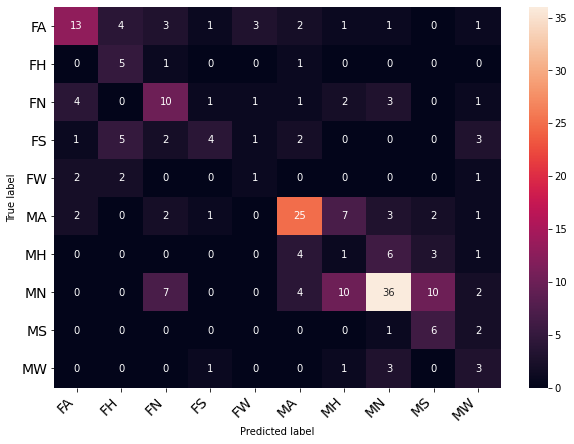

In [ ]:
# Get the predictions file 
classes = df1.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(df1.actualvalues, df1.predictedvalues)
print(accuracy_score(df1.actualvalues, df1.predictedvalues))
print_confusion_matrix(c, class_names = classes)

##Ensemble Model

حال می خواهیم برای آزمایش یک مدل به روش ترکیبی برنیم یعنی یک مدل بسازیم که فقط داده های مربوط به جنسیت زن را دریاقت کند و مدل دیگر فقط داده های مربوط به کلاس مرد را دریاافت کند و درنهایت این دو مدل را با هم ترکیب کنیم.

In [ ]:
male_features = []
male_label = []
female_features = []
female_label = []

for i in range(len(file_name)):
  if file_name[i][4] == 'F':
    female_features.append(sound_features[i])
    female_label.append(label[i])

  elif file_name[i][4] == 'M':
    male_features.append(sound_features[i])
    male_label.append(label[i])    

In [ ]:
print("number of female sounds: ", len(female_label))
print("number of male sounds: ", len(male_label))

number of female sounds:  839
number of male sounds:  1155


In [ ]:
male_features = np.asarray(male_features)
female_features = np.asarray(female_features)

In [ ]:
male_label = np.asarray(male_label)
female_label = np.asarray(female_label)

In [ ]:
female_features.shape

(839, 25, 1)

In [ ]:
# split female dataset into train and valid
xf_train,xf_val,yf_train,yf_val= train_test_split(np.array(female_features),female_label, test_size=0.20, random_state=42,shuffle=False)

In [ ]:
# split male dataset into train and valid
xm_train,xm_val,ym_train,ym_val= train_test_split(np.array(male_features),male_label, test_size=0.20, random_state=42,shuffle=False)

In [ ]:
print(len(xf_train))
print(len(xf_val))
print(yf_train.shape)

671
168
(671, 10)


###Model for female

In [ ]:
# model for female
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(64, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model_F = Model(inputs=input_layer, outputs=output_layer , name = "model_F")
model_F.summary()

Model: "model_F"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
layer1 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170 

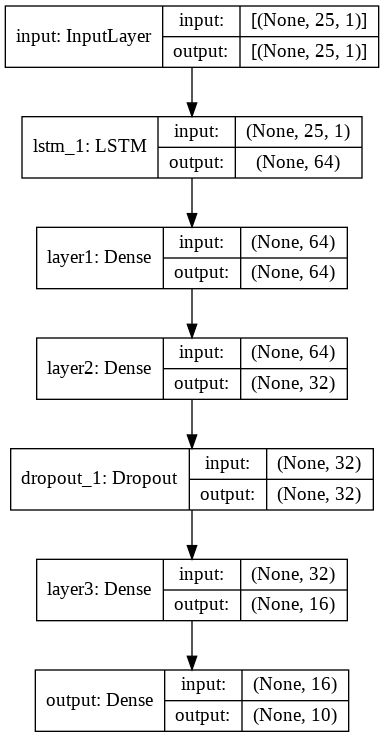

In [ ]:
plot_model(model_F, show_shapes=True)

In [ ]:
model_F.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_F.fit(xf_train, yf_train, validation_data = (xf_val, yf_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
6/6 [==============================] - 3s 131ms/step - loss: 2.2966 - accuracy: 0.1199 - val_loss: 2.2497 - val_accuracy: 0.2381
Epoch 2/60
6/6 [==============================] - 0s 28ms/step - loss: 2.2433 - accuracy: 0.2204 - val_loss: 2.1781 - val_accuracy: 0.2381
Epoch 3/60
6/6 [==============================] - 0s 28ms/step - loss: 2.1755 - accuracy: 0.2581 - val_loss: 2.0724 - val_accuracy: 0.2381
Epoch 4/60
6/6 [==============================] - 0s 26ms/step - loss: 2.0852 - accuracy: 0.2967 - val_loss: 1.9254 - val_accuracy: 0.2381
Epoch 5/60
6/6 [==============================] - 0s 29ms/step - loss: 1.9928 - accuracy: 0.2752 - val_loss: 1.7524 - val_accuracy: 0.4405
Epoch 6/60
6/6 [==============================] - 0s 27ms/step - loss: 1.8895 - accuracy: 0.3318 - val_loss: 1.6091 - val_accuracy: 0.4286
Epoch 7/60
6/6 [==============================] - 0s 27ms/step - loss: 1.7804 - accuracy: 0.3805 - val_loss: 1.5189 - val_accuracy: 0.4762
Epoch 8/60
6/6 [==========

In [ ]:
model_F.save_weights("lstm_F_weights.h5")
model_F.save("lstm_F.h5")

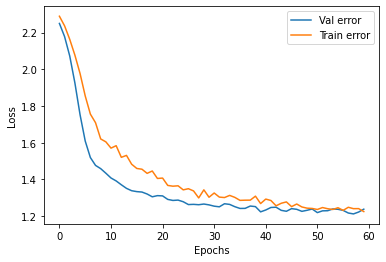

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

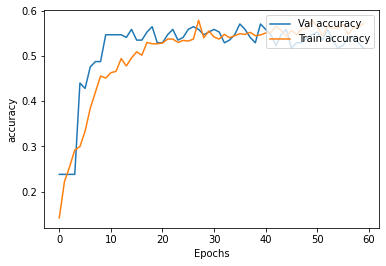

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

###Model for male

In [ ]:
# model for male
# LSTM input -> (timesteps,Features)
# each timestep represent with 1 features

input_layer = Input(shape=(25,1), name ="input")
lstm_layer = LSTM(64, return_sequences=False)(input_layer)
hidden_layer1 = Dense(64 ,activation='relu' , name="layer1")(lstm_layer)
hidden_layer2 = Dense(32 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(16 ,activation='tanh' , name="layer3")(droupout_layer)
output_layer = Dense(10 ,activation='softmax' , name="output")(hidden_layer3)

model_M = Model(inputs=input_layer, outputs=output_layer , name = "model_M")
model_M.summary()

Model: "model_M"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 25, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
layer1 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170 

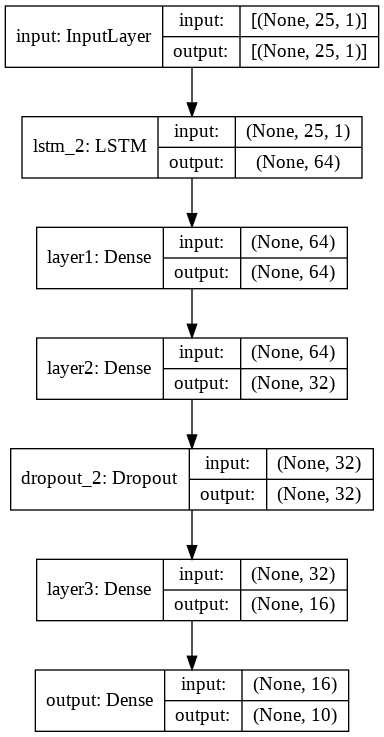

In [ ]:
plot_model(model_M, show_shapes=True)

In [ ]:
model_M.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_M.fit(xm_train, ym_train, validation_data = (xm_val, ym_val) ,epochs=60, batch_size = 128 ,verbose=1)

Epoch 1/60
8/8 [==============================] - 2s 92ms/step - loss: 2.2727 - accuracy: 0.2630 - val_loss: 2.1923 - val_accuracy: 0.3766
Epoch 2/60
8/8 [==============================] - 0s 26ms/step - loss: 2.1626 - accuracy: 0.3673 - val_loss: 1.9722 - val_accuracy: 0.3939
Epoch 3/60
8/8 [==============================] - 0s 27ms/step - loss: 1.9400 - accuracy: 0.4030 - val_loss: 1.6320 - val_accuracy: 0.4502
Epoch 4/60
8/8 [==============================] - 0s 25ms/step - loss: 1.7660 - accuracy: 0.4123 - val_loss: 1.5079 - val_accuracy: 0.4589
Epoch 5/60
8/8 [==============================] - 0s 26ms/step - loss: 1.6357 - accuracy: 0.4444 - val_loss: 1.4069 - val_accuracy: 0.4848
Epoch 6/60
8/8 [==============================] - 0s 25ms/step - loss: 1.5018 - accuracy: 0.5127 - val_loss: 1.2923 - val_accuracy: 0.5758
Epoch 7/60
8/8 [==============================] - 0s 27ms/step - loss: 1.3731 - accuracy: 0.5702 - val_loss: 1.1399 - val_accuracy: 0.6580
Epoch 8/60
8/8 [===========

In [ ]:
model_M.save_weights("lstm_M_weights.h5")
model_M.save("lstm_M.h5")

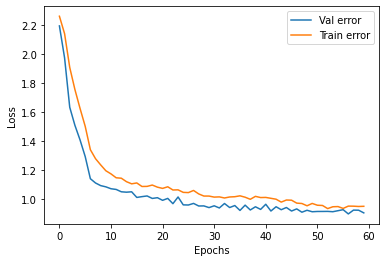

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

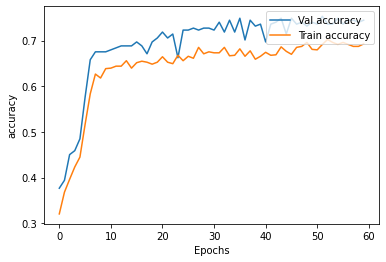

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

حالا می خواهیم نتیجه ی این دو مدل را برای داده های تست ترکسیب کنیم.

In [ ]:
prediction_F = model_F.predict(test_sound_features, batch_size = 64)
prediction_M = model_M.predict(test_sound_features, batch_size = 64)

In [ ]:
preds_F = prediction_F.argmax(axis=1)
preds_M = prediction_M.argmax(axis=1)

In [ ]:
print(preds_F[0:10])
print(preds_M[0:10])

[2 2 2 0 0 0 2 2 2 0]
[5 7 8 5 5 5 7 7 5 5]


In [ ]:
# average of two models for test dataset
final_pred = (preds_F + preds_M)//2

In [ ]:
print(final_pred)

[3 4 5 2 2 2 4 4 3 2 4 5 2 5 2 3 5 2 4 3 3 4 2 3 4 2 2 4 2 4 4 3 4 4 4 3 4
 3 3 4 3 4 2 4 4 3 2 3 2 4 4 4 4 4 2 4 4 3 3 2 4 5 2 5 4 2 3 4 2 3 2 4 3 2
 4 4 5 4 3 5 3 4 5 4 2 4 5 4 3 4 2 4 2 2 2 4 2 3 3 4 4 4 5 3 2 2 4 4 4 4 4
 4 2 4 5 4 3 4 4 4 4 2 4 3 4 4 4 2 2 4 3 2 4 2 5 4 4 2 4 4 2 4 4 5 4 4 4 2
 5 4 4 3 4 4 4 2 2 3 3 3 2 3 4 3 4 4 4 5 4 3 4 4 5 4 2 4 2 3 4 2 4 4 4 3 2
 3 2 5 4 4 4 3 4 2 4 4 4 2 4 2 2 4 4 4 2 4 4 4 2 3 4 3 3 4 4 4 5 2 4 4 4 3
 5 4 4 4 4]


In [ ]:
abc = final_pred.astype(int).flatten()
# predict on test dataset
predictions_emotion = (le.inverse_transform((abc)))

In [ ]:
actual=y_actual_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (le.inverse_transform((abc123)))

In [ ]:
# save result in .csv file
result_emotion_ensemble = pd.DataFrame({'Id':filename_test ,'actualvalues': actualvalues, 'predictedvalues': predictions_emotion})
result_emotion_ensemble.to_csv('result_emotion_ensemble.csv', index=False)

In [ ]:
result_emotion_ensemble.head()

,Id,actualvalues,predictedvalues
0,2705F.wav,FN,FS
1,2707M.wav,MH,FW
2,2708F.wav,FN,MA
3,2710M.wav,MA,FN
4,2711M.wav,MA,FN


In [ ]:
result_emotion_ensemble.groupby('actualvalues').count()

,Id,predictedvalues
actualvalues,,
FA,29,29
FH,7,7
FN,23,23
FS,18,18
FW,6,6
MA,43,43
MH,15,15
MN,69,69
MS,9,9


طبق نتیجه قطعه کد بعدی می بینیم که ترکیب این دو مدل و میانگین گرفتن نتایج آن ها نتیجه ی مناسبی ندارد و فقط صداها را در 4 کلاس دسته بندی می کند. در واقع این روش میانگین گیری مناسب نیست و احتمالا با روش میانگین وزن دار بهتر کار می کند.

In [ ]:
result_emotion_ensemble.groupby('predictedvalues').count()

,Id,actualvalues
predictedvalues,,
FN,53,53
FS,42,42
FW,112,112
MA,20,20


In [ ]:
from sklearn.metrics import accuracy_score

همانطور که در زیر می بینیم الان دقت مدل ترکیبی ما روی داده ها 0.03 درصد است و این خیلیییی کم است و باعث شده اشتباهات زیادی داشته باشد مثلا تعداد خیلی زیادی از مردان بی تفاوت را به عنوان زن با احساس شگفتی شناسایی کرده!!.

0.030837004405286344


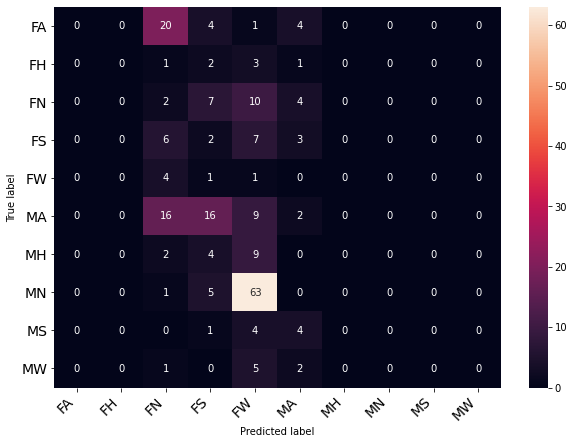

In [ ]:
# Get the predictions file 
classes = result_emotion_ensemble.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(result_emotion_ensemble.actualvalues, result_emotion_ensemble.predictedvalues)
print(accuracy_score(result_emotion_ensemble.actualvalues, result_emotion_ensemble.predictedvalues))
print_confusion_matrix(c, class_names = classes)